# Task Scheduler using Heap Data Structure

Part A

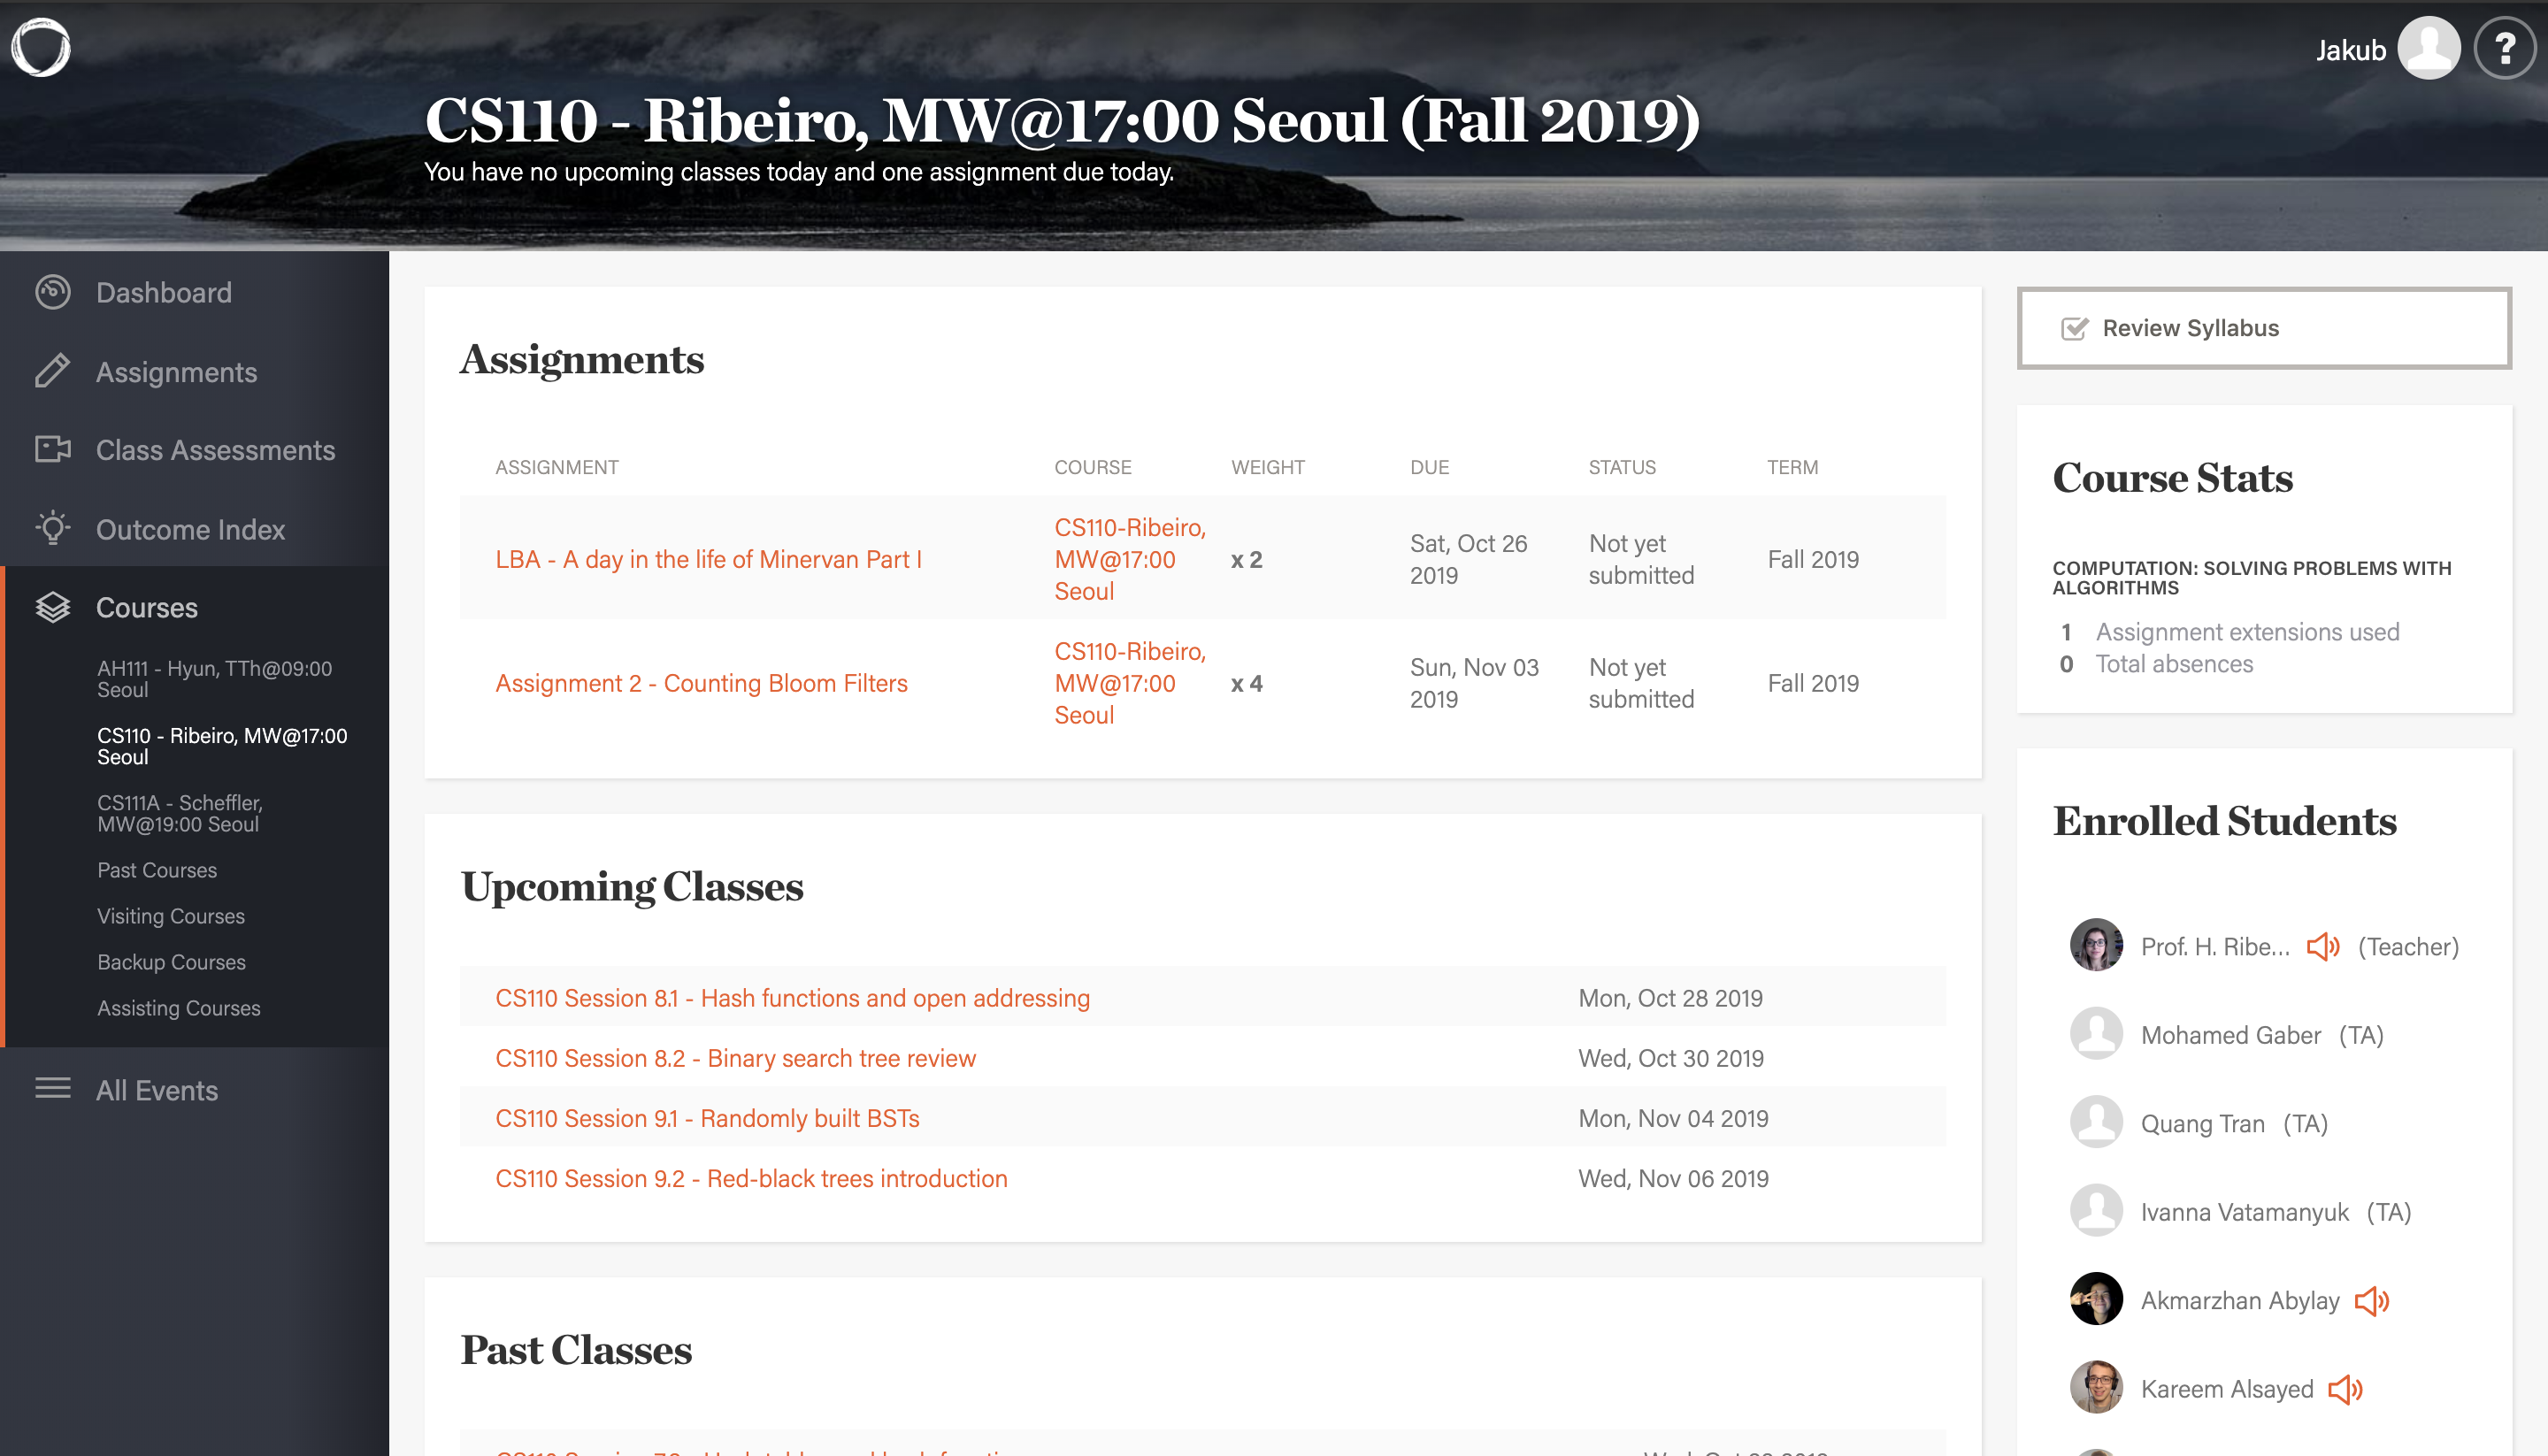

In [2]:
from IPython.display import Image
Image("CS110 Dashboard Screenshot.png")

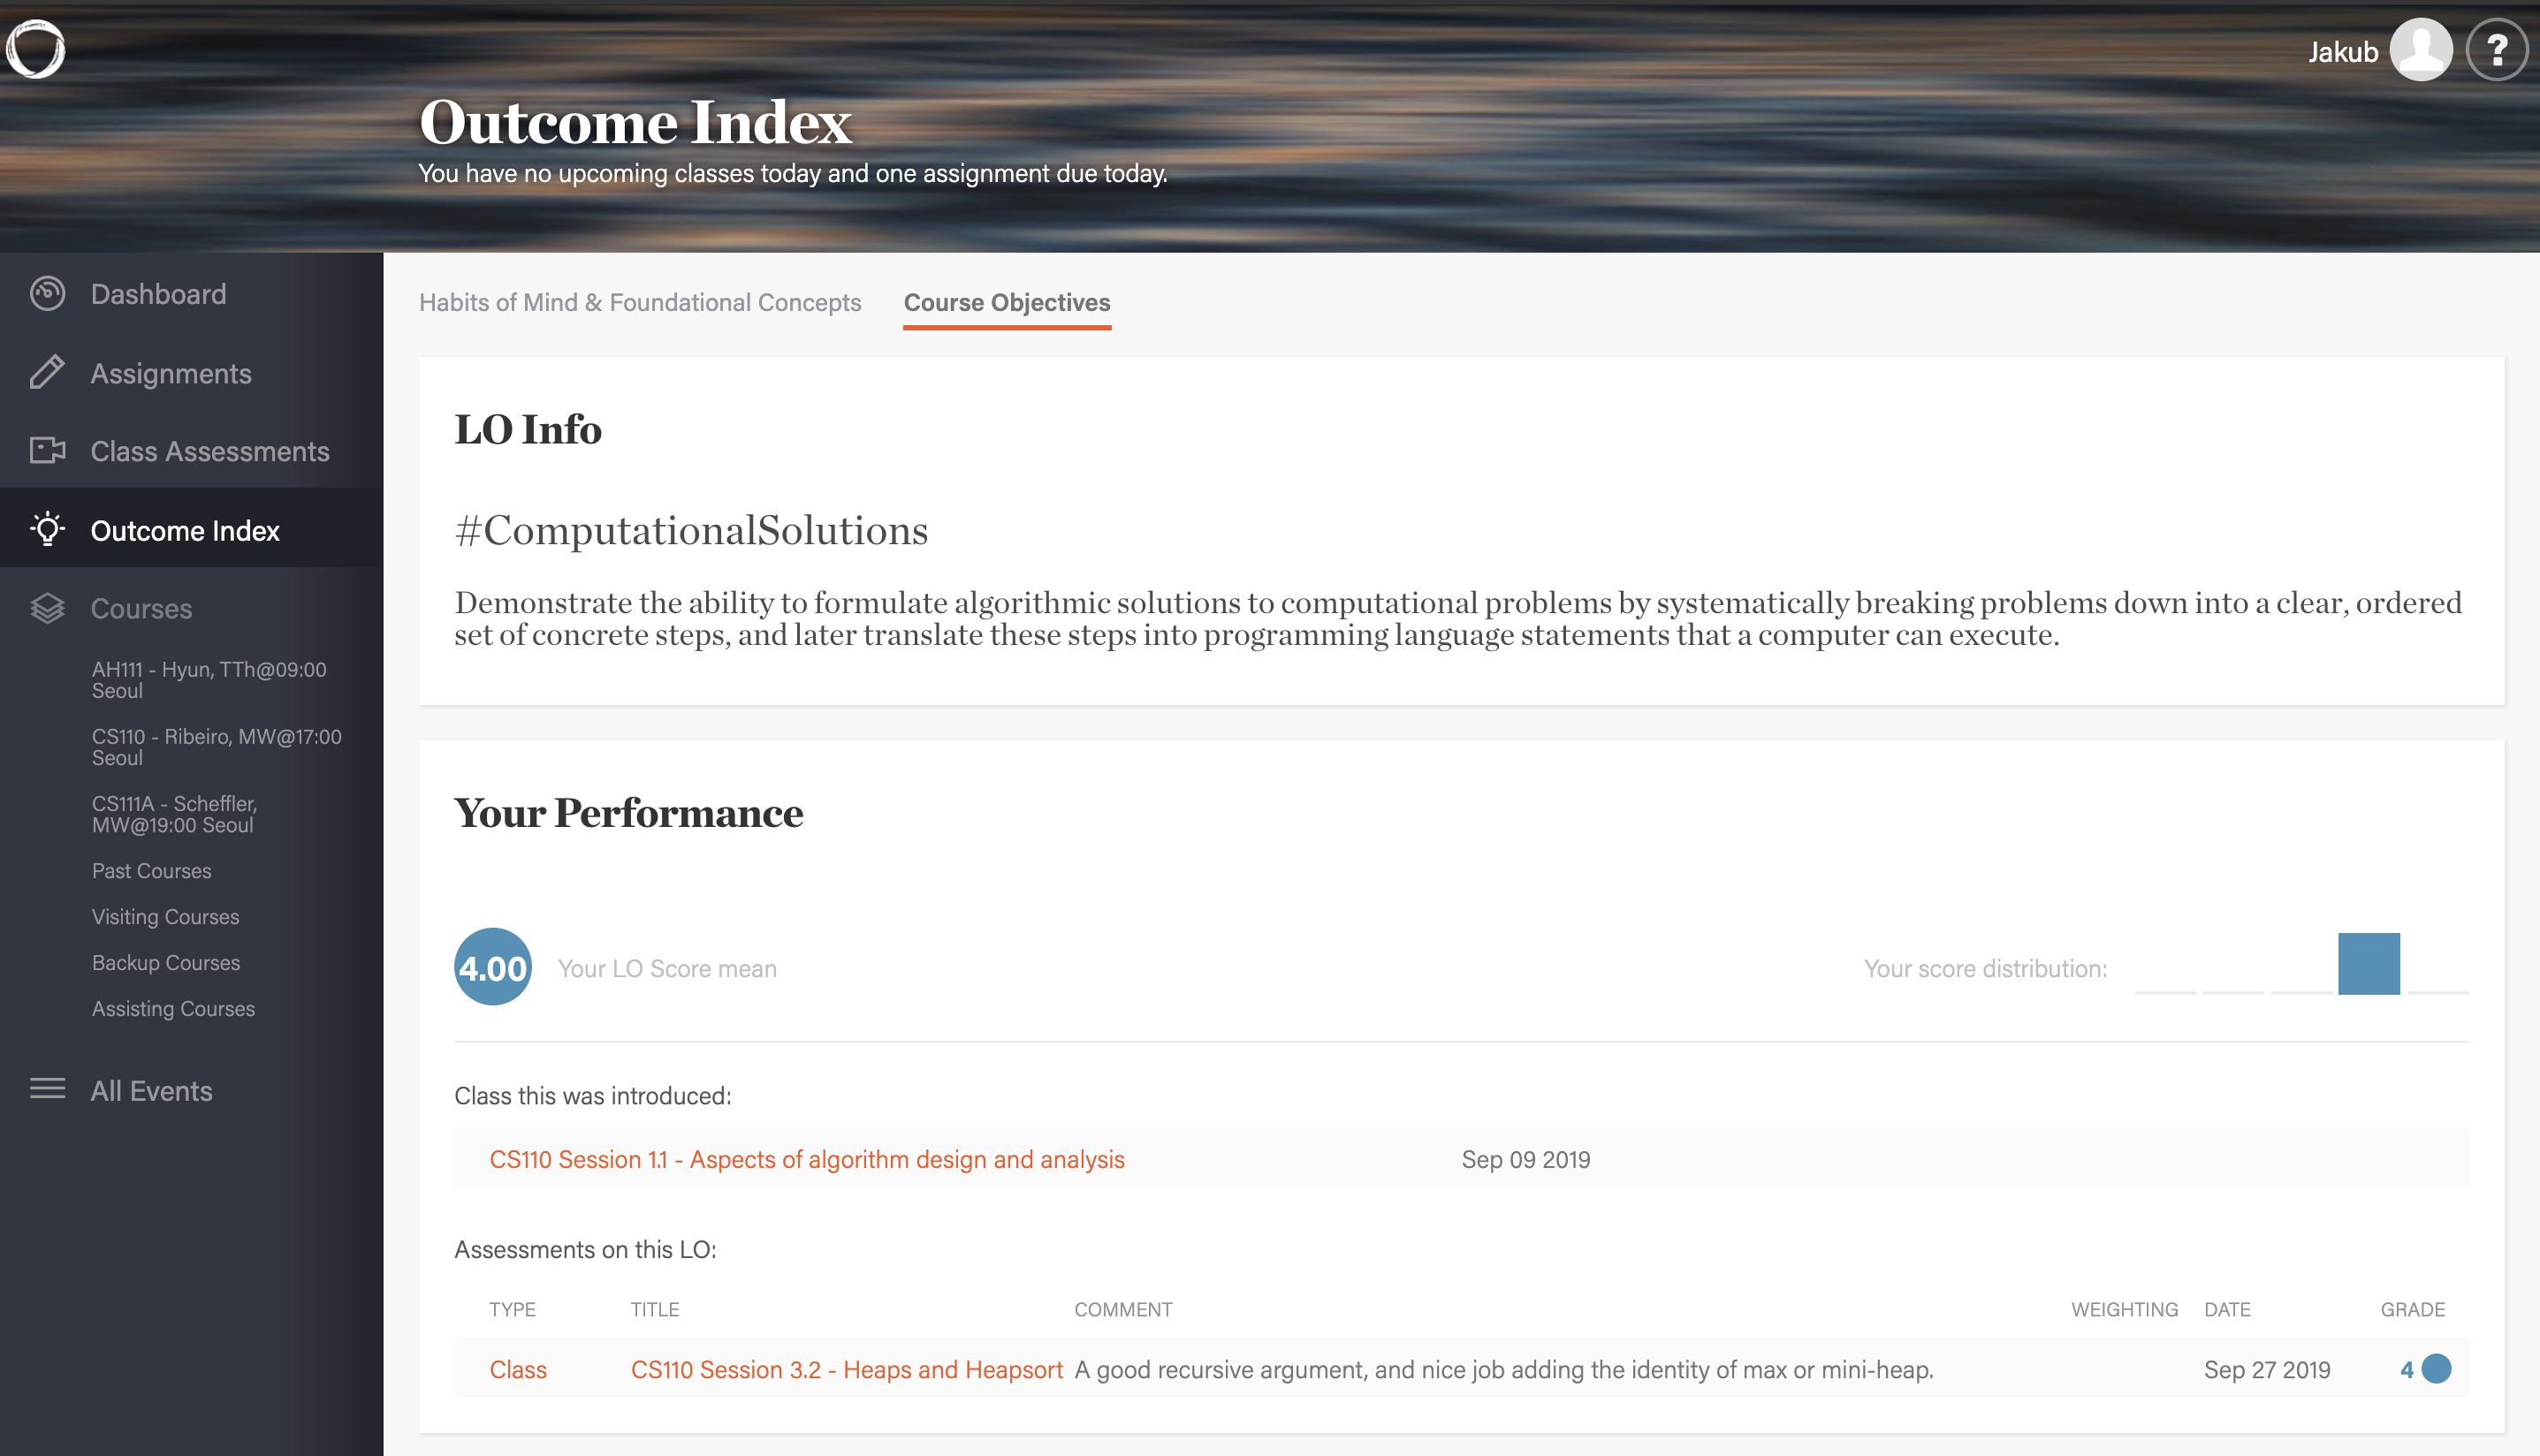

In [3]:
from IPython.display import Image
Image("#computationalsolutions.png")

-----

Part B

In [89]:
import pandas as pd
from random import randint

#Naming the columns
column_names=['Activity','Task ID','Task description', 'Task duration in minutes', 'Multitasking', 'Dependencies', 'Status', 'Priority']
#Adding the data of tasks to the data list composed of lists (each nested list is a task)
data=[['DDP','DDP|01','Taking a bus from the res hall to the Dongdaemun Design Plaza',35,True,None,'NOT-YET-STARTED',0],
      ['DDP','DDP|02','Buying tickets',5,False,'DDP|01','NOT_YET_STARTED',0],
      ['DDP','DDP|03','Taking pics of the spot',2,False,'DDP|01','NOT_YET_STARTED',0],
      ['DDP','DDP|04','Taking pics with friends to capture the memory',5,False,'DDP|01','NOT_YET_STARTED',0],
      ['DDP','DDP|05','Exploring the exhibition',200,True,['DDP|01','DDP|02'],'NOT_YET_STARTED',0],
      ['BBQ','BBQ|01','Find a good Korean BBQ place online',15,True,None,'NOT_YET_STARTED',0],
      ['BBQ','BBQ|02','Get to the restaurant',45,True,'BBQ|01','NOT_YET_STARTED',0],
      ['BBQ','BBQ|03','Feast',60,False,['BBQ|01','BBQ|02'],'NOT_YET_STARTED',0],
      ['GEM','GEM|01','Admire Korean nature',30,True,None,'NOT_YET_STARTED',0],
      ['GEM','GEM|02','Make a Korean friend!',15,True,None,'NOT_YET_STARTED',0],
      ['GEM','GEM|03','Listen to the podcast on Korean politics',30,True,None,'NOT_YET_STARTED',0],
      ['GEM','GEM|04','Meet a Korean girl',20,True,None,'NOT_YET_STARTED',0],
      ['GEM','GEM|05','Try Korean sweets',10,True,None,'NOT_YET_STARTED',0],
      ['GEM','GEM|06','Listen to K-Pop',15,True,None,'NOT_YET_STARTED',0],
      ['GEM','GEM|07','Try Korean street food',5,True,None,'NOT_YET_STARTED',0],
      ['GEM','GEM|08','Get some bubble tea',5,True,None,'NOT_YET_STARTED',0],
      ['GEM','GEM|09','High five a Korean child',1,True,None,'NOT_YET_STARTED',0],
      ['GEM','GEM|10','Research India!',10,True,None,'NOT_YET_STARTED',0],
      ['GBP','GBP|01','Finding the directions to the Gyeongbokgung Palace',3,False,None,'NOT_YET_STARTED',0],
      ['GBP','GBP|02','Commuting to the Gyeongbokgung Palace',50,True,'GBP|01','NOT_YET_STARTED',0],
      ['GBP','GBP|03','Get the Hanbok cuz it gives you a free entrance!',25,True,['GBP|01','GBP|02'],'NOT_YET_STARTED',0],
      ['GBP','GBP|04','Since you have the Hanbok, do some cultural appropriation and post a pic in it to your Instagram story!',5,False,['GBP|01','GBP|02','GBP|03'],'NOT_YET_STARTED',0],
      ['GBP','GBP|05','Time for culture. Explore the palace and the exhibitions',150,True,['GBP|01','GBP|02','GBP|03','GBP|04'],'NOT_YET_STARTED',0],
      ['GBP','GBP|06','Learn a lot about the history',45,True,['GBP|01','GBP|02','GBP|03','GBP|04','GBP|05'],'NOT_YET_STARTED',0],
      ['GBP','GBP|07','Too much culture now. Get some food and chill',30,True,['GBP|01','GBP|02','GBP|03','GBP|04','GBP|05','GBP|06'],'NOT_YET_STARTED',0],
      ['GBP','GBP|08','Time to chill, get back to the res',50,True,['GBP|01','GBP|02','GBP|03','GBP|04','GBP|05','GBP|06','GBP|07'],'NOT_YET_STARTED',0],
      ['BSB','BSB|01','Get the tickets for the baseball game',15,True,None,'NOT_YET_STARTED',0],
      ['BSB','BSB|02','Commute to the game',45,False,'BSB|01','NOT_YET_STARTED',0],
      ['BSB','BSB|03','Get hot-dogs',10,False,['BSB|01','BSB|02'],'NOT_YET_STARTED',0],
      ['BSB','BSB|04','Watch the game',150,False,['BSB|01','BSB|02','BSB|03'],'NOT_YET_STARTED',0],
      ['BSB','BSB|05','Get back home',50,False,['BSB|01','BSB|02','BSB|03', 'BSB|04'],'NOT_YET_STARTED',0],
      ['SFW','SFW|01','Dress up as trendy as you can',20,False,None,'NOT_YET_STARTED',0],
      ['SFW','SFW|02','Go to the DDP to see the Seould Fashion Week',40,False,['SFW|01'],'NOT_YET_STARTED',0],
      ['SFW','SFW|03','Act cool',60,True,['SFW|01','SFW|02'],'NOT_YET_STARTED',0],
      ['SFW','SFW|04','Take some pics for the Gram',15,False,['SFW|01','SFW|02','SFW|03'],'NOT_YET_STARTED',0],
      ['SFL','SFL|01','Take a bus to the Starfield Library',45,True,None,'NOT_YET_STARTED',0],
      ['SFL','SFL|02','Get a coffee',5,True,['SFL|01'],'NOT_YET_STARTED',0],
      ['SFL','SFL|03','Study a bit',120,True,['SFL|01','SFL|02'],'NOT_YET_STARTED',0],
      ['SFL','SFL|04','Take some pictures',15,False,['SFL|01','SFL|02', 'SFL|03'],'NOT_YET_STARTED',0],
      ['SFL','SFL|05','Come back home',45,True,['SFL|01','SFL|02', 'SFL|03', 'SFL|04'],'NOT_YET_STARTED',0]  
      ]


#Creating a dataframe of our tasks
df = pd.DataFrame(columns=column_names, data=data)

    
df

,Activity,Task ID,Task description,Task duration in minutes,Multitasking,Dependencies,Status,Priority
0,DDP,DDP|01,Taking a bus from the res hall to the Dongdaem...,35,True,None,NOT-YET-STARTED,0
1,DDP,DDP|02,Buying tickets,5,False,DDP|01,NOT_YET_STARTED,0
2,DDP,DDP|03,Taking pics of the spot,2,False,DDP|01,NOT_YET_STARTED,0
3,DDP,DDP|04,Taking pics with friends to capture the memory,5,False,DDP|01,NOT_YET_STARTED,0
4,DDP,DDP|05,Exploring the exhibition,200,True,"[DDP|01, DDP|02]",NOT_YET_STARTED,0
5,BBQ,BBQ|01,Find a good Korean BBQ place online,15,True,None,NOT_YET_STARTED,0
6,BBQ,BBQ|02,Get to the restaurant,45,True,BBQ|01,NOT_YET_STARTED,0
7,BBQ,BBQ|03,Feast,60,False,"[BBQ|01, BBQ|02]",NOT_YET_STARTED,0
8,GEM,GEM|01,Admire Korean nature,30,True,None,NOT_YET_STARTED,0
9,GEM,GEM|02,Make a Korean friend!,15,True,None,NOT_YET_STARTED,0


-----

Part C

The way I have dealt with multitasking here, is that I have created a separate category for the 'side' tasks - the ones that can be executed simultanously to the main tasks that have the option of multitasking. When the main task has 'Multitasking' column == True, the scheduler draws a side task, labeled as "GEM", and completes as much of it as possbile. If the duration of the task is bigger than or equal to the duration of the side task, the entire side task will be executed during the main task. However, if the duration of the "GEM" task is bigger than that of the main task, the scheduler executes the side task for as long as the main task lasts, and appends the side task with the remaining time back to the heap. This way, all the multitasks are completed "within" the duration of the main tasks and we don't have to waste additional time for executing them after the main tasks.

In [90]:
def priority_evaluation(i):
    #Checking if the task has any dependencies. 
    #If it has none, +50 to the priority since that 
    #indicates the first task from the activity
    if df['Dependencies'][i]==None:
        df['Priority'][i]+=50
        
    #If it has, +5 to the priority of the task that it is 
    #dependent upon will be added
    if df['Dependencies'][i]!=None:
        for j in range(len(df['Dependencies'][i])):
            df.loc[df['Task ID']==df['Dependencies'][i][j], ['Priority']]+=5
    #If the task can be executed simultanously with another one, +1 added to priority 
    if df['Multitasking'][i]==True:
        df['Priority'][i]+=1
    
    #If it's a long task, +3 added to priority
    if df['Task duration in minutes'][i]>120:
        df['Priority'][i]+=3
    #If it's a medium-long task, +2 added to priority
    elif ((df['Task duration in minutes'][i]<=120) & (df['Task duration in minutes'][i]>=60)):
        df['Priority'][i]+=2
    #If it's a short task, +1 added to priority
    elif ((df['Task duration in minutes'][i]<60) & (df['Task duration in minutes'][i]>=15)):
        df['Priority'][i]+=1
    
    #If it's one of the GEM type of tasks, it's priority is set to -1
    #It is because we will use this tasks complementary to the others  
    #and we don't want to include them in the regular heap sorting
    if 'GEM' in df['Task ID'][i]:
        df['Priority'][i]=(-1)

#Running the priority_evaluation functions on the entire dataframe        
for i in range(len(df)):
    priority_evaluation(i)
df

/Users/kubawarmuz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/kubawarmuz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/kubawarmuz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kubawarmuz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: Setting

,Activity,Task ID,Task description,Task duration in minutes,Multitasking,Dependencies,Status,Priority
0,DDP,DDP|01,Taking a bus from the res hall to the Dongdaem...,35,True,None,NOT-YET-STARTED,57
1,DDP,DDP|02,Buying tickets,5,False,DDP|01,NOT_YET_STARTED,5
2,DDP,DDP|03,Taking pics of the spot,2,False,DDP|01,NOT_YET_STARTED,0
3,DDP,DDP|04,Taking pics with friends to capture the memory,5,False,DDP|01,NOT_YET_STARTED,0
4,DDP,DDP|05,Exploring the exhibition,200,True,"[DDP|01, DDP|02]",NOT_YET_STARTED,4
5,BBQ,BBQ|01,Find a good Korean BBQ place online,15,True,None,NOT_YET_STARTED,57
6,BBQ,BBQ|02,Get to the restaurant,45,True,BBQ|01,NOT_YET_STARTED,7
7,BBQ,BBQ|03,Feast,60,False,"[BBQ|01, BBQ|02]",NOT_YET_STARTED,2
8,GEM,GEM|01,Admire Korean nature,30,True,None,NOT_YET_STARTED,-1
9,GEM,GEM|02,Make a Korean friend!,15,True,None,NOT_YET_STARTED,-1


-----

Part D

In [91]:
# 
# Defining some basic binary tree functions
#
def left(i):         # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1   #          returns the array index of its left child.

def right(i):        # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2   #           returns the array index of its right child.

def parent(i):       # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2  #            returns the array index of its parent


# Defining the Python class MaxHeapq to implement a max heap data structure.
# Every Object in this class has two attributes:
#           - heap : A Python list where key values in the max heap are stored
#           - heap_size: An integer counter of the number of keys present in the max heap
class MaxHeapq:
    """ 
    This class implements properties and methods that support a max priority queue data structure
    """  
    # Class initialization method. Use: heapq_var = MaxHeapq()
    def __init__(self):        
        self.heap       = []
        self.heap_size  = 0

    # This method returns the highest key in the priority queue. 
    #   Use: key_var = heapq_var.max()
    def maxk(self):              
        return self.heap[0]     
    
    # This method implements the INSERT key into a priority queue operation
    #   Use: heapq_var.heappush(key)
    def heappush(self, key):   
        """
        Inserts the value of key onto the priority queue, maintaining the max heap invariant.
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    # This method implements the INCREASE_KEY operation, which modifies the value of a key
    # in the max priority queue with a higher value. 
    #   Use heapq_var.increase_key(i, new_key)
    def increase_key(self, i, key): 
        if key[7] < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[parent(i)][7] < self.heap[i][7]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
    # This method implements the MAX_HEAPIFY operation for the max priority queue. The input is 
    # the array index of the root node of the subtree to be heapify.
    #   Use heapq_var.heapify(i)        
    def heapify(self, i):
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l][7]>heap[i][7]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r][7] > heap[largest][7]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    # This method implements the EXTRACT_MAX operation. It returns the largest key in 
    # the max priority queue and removes this key from the max priority queue.
    #   Use key_var = heapq_var.heappop() 
    def heappop(self):
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

In [92]:
#Checking which activity has the highest priority
priorities_sum=df.groupby("Activity")['Priority'].sum()
priorities_sum.sort_values(ascending=False).index

Index(['GBP', 'SFL', 'BSB', 'SFW', 'DDP', 'BBQ', 'GEM'], dtype='object', name='Activity')

In [93]:
#Creating a priority queues for each activity in 
#the sorted order by the activity sum priority
GBP_heap = MaxHeapq()
GBP_list=df[df['Activity']=='GBP'].values.tolist()
for key in GBP_list:
    GBP_heap.heappush(key)
    
SFL_heap = MaxHeapq()
SFL_list=df[df['Activity']=='SFL'].values.tolist()
for key in SFL_list:
    SFL_heap.heappush(key)
    
BSB_heap = MaxHeapq()
BSB_list=df[df['Activity']=='BSB'].values.tolist()
for key in BSB_list:
    BSB_heap.heappush(key)
    
SFW_heap = MaxHeapq()
SFW_list=df[df['Activity']=='SFW'].values.tolist()
for key in SFW_list:
    SFW_heap.heappush(key)
    
DDP_heap = MaxHeapq()
DDP_list=df[df['Activity']=='DDP'].values.tolist()
for key in DDP_list:
    DDP_heap.heappush(key)
    
BBQ_heap = MaxHeapq()
BBQ_list=df[df['Activity']=='BBQ'].values.tolist()
for key in BBQ_list:
    BBQ_heap.heappush(key)
    
GEM_heap = MaxHeapq()
GEM_list=df[df['Activity']=='GEM'].values.tolist()
for key in GEM_list:
    GEM_heap.heappush(key)

In [94]:
#Adding all the activity heaps to a list 
all_heaps=[GBP_heap, SFL_heap, BSB_heap, SFW_heap, DDP_heap, BBQ_heap, GEM_heap]

In [95]:
time=0 #setting the time to 0

for i in range(len(all_heaps)): #running the function through all the activities
    #running the function through all the tasks within an activity
    while all_heaps[i].heap_size>0:
        #choosing a random number between 0 and 2. 
        #It will decide whether or not we will execute a multitask alongside the
        #main one
        luck = randint(0,4)  
        #popping the root of the heap - the task with the highest priority
        task=all_heaps[i].heappop() 
        task[6]='IN-PROGRESS' #setting the status to "IN-PROGRESS"
        #Creating the condition for multitasking
        if task[4]==True:
            gem=None 
            #gem is the task that can be executed simultanously with any other 
            #task in the list
            if GEM_heap.heap and (luck==1 or 2): #40% of having luck, i.e. 
                                                 #executing multitask
                gem=GEM_heap.heappop()
                
            if gem==None: #if none is found, the function continues with 
                          #executing only one task
                time+=task[3] #adding the duration of the task to the total time
                task[6]='COMPLETED' #setting the status to COMPLETED
                print(task[2]) #printing the statement of the action
                print('Time taken:',task[3])
                print('Total time:',time)
                print('-----------------------------------------')
        
            else: 
                if gem[3]>task[3]: #setting the execution flow when the duration of 
                                   #GEM is longer than the main task
                    duration=gem[3]#saving the time taken to execute the side task
                    gem[3]-=task[3]#subtractting the time of the task from the gem
                                   #time
                    time+=task[3]*2 #adding the time of task*2 because we also count 
                                #the time taken to accompllish the part of GEM
                    gem[6]='IN-PROGRESS'
                    GEM_heap.heappush(gem)#pushing back the gem to its heap
                    task[6]='COMPLETED'
                    print(task[2])
                    print('Multitasking with', gem[2], 'for',gem[3], 'minutes')
                    print('Time taken:',(task[3]*2))
                    print('Total time:',time)
                    print('-----------------------------------------')
                    
                #setting the condition for when task duration 
                #is bigger than the gem's
                elif gem[3]<task[3]:
                    duration=gem[3]+task[3]
                    task[3]-=gem[3]
                    time+=gem[3]*2
                    gem[6]='COMPLETED'
                    time+=task[3]
                    print(task[2])
                    print('Multitasking with', gem[2], 'for',gem[3], 'minutes')
                    print('Time taken:',duration)
                    print('Total time:',time)
                    print('-----------------------------------------')
                    
                #setting the condition for when task duration
                #is equal to that of the gem
                else:
                    time+=task[3]*2
                    task[6]='COMPLETED'
                    gem[6]='COMPLETED'
                    print(task[2])
                    print('Multitasking with', gem[2], 'for', gem[3], 'minutes')
                    print('Time taken:',task[3]*2)
                    print('Total time:',time)
                    print('-----------------------------------------')
        else: 
            time+=task[3] #adding the duration of the task to the total time
            task[6]='COMPLETED' #setting the status to COMPLETED
            print(task[2]) #printing the statement of the action
            print('Time taken:',task[3])
            print('Total time:',time)
            print('-----------------------------------------')

Finding the directions to the Gyeongbokgung Palace
Time taken: 3
Total time: 3
-----------------------------------------
Commuting to the Gyeongbokgung Palace
Multitasking with Admire Korean nature for 30 minutes
Time taken: 80
Total time: 83
-----------------------------------------
Get the Hanbok cuz it gives you a free entrance!
Multitasking with Research India! for 10 minutes
Time taken: 35
Total time: 118
-----------------------------------------
Since you have the Hanbok, do some cultural appropriation and post a pic in it to your Instagram story!
Time taken: 5
Total time: 123
-----------------------------------------
Time for culture. Explore the palace and the exhibitions
Multitasking with High five a Korean child for 1 minutes
Time taken: 151
Total time: 274
-----------------------------------------
Learn a lot about the history
Multitasking with Get some bubble tea for 5 minutes
Time taken: 50
Total time: 324
-----------------------------------------
Too much culture now. Get

------

Part E

One of the drawbacks of this algorithm is that some activities might be time-dependent. For example, the Seoul Fashion Week happens during only one week, hence even if we increased the priority of this activity, it would be impossible to account for the time-dependency. Moreover, the algorithm does not take into account any external information that would make a human modify the schedule on-the-go. For instance, there might be a special offer as e.g. a free entrance to a museum and we would like to take advantage of it. Also, the algorithm is very basic overall and does not take into account multiple inputs in calculating the priorities, such as seasonal weather fluctuations, school workload, etc. Finally, some multitasking combinations do not really fit well with one another. For instance, 'Study a bit' and 'Listen to the podcast on Korean politics for 30 minutes', as suggested by the scheduler would not really work together since it would be hard to study efficiently and focus on the podcast at the same time. To combat it, we would have to for example create multiple restrictions, such as creating another column, which would contain the 'side' tasks that the main task can't be comined with.  

However, using the scheduler as a suggestion could be a good idea if its user tailored the weights ascribed to the priority from different aspects of the task according to his/her preferences. 

----------------------------

HCs

#algorithms: I have designed an approach to the scheduler problem which contains creating multiple priority queues. By doing so, I have avoided a situation in which 2 or more activities are in progress at the same time (the algorithm completes all the tasks from one activity before moving to the next one)

#breakitdown: I have divided the problem into multiple parts: creating the priority_evaluation function, dividing the activities into groups and calculating their total priorities, creating multiple priority queues and finally, running the scheduler with specific conditions

#constraints: To create the solution, a lot of constraints had to be taken into consideration: handling dependencies, making sure that multpile activities are not in progress at the same time, not being able to use external libraries